In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder

In [54]:
df = pd.read_csv("flight_scrapped.csv")

# Data Cleaning and transforming

In [55]:
df.shape

(1525, 11)

In [56]:
df.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
name             object
departure        object
arrival          object
duration         object
stop             object
price            object
departure_loc    object
arrival_loc      object
doj              object
dtype: object

In [57]:
df.head()

,Unnamed: 0,Unnamed: 0.1,name,departure,arrival,duration,stop,price,departure_loc,arrival_loc,doj
0,0,0,Air Asia,18:40,06:20\n+ 1 day,11h 40m,1 Stop,"5,953",delhi,mumbai,"Tue, 19 Oct"
1,1,1,Go First,18:50,20:45,1h 55m,Non Stop,"5,954",delhi,mumbai,"Tue, 19 Oct"
2,2,2,Air Asia,21:20,14:15\n+ 1 day,16h 55m,1 Stop,"7,926",delhi,mumbai,"Tue, 19 Oct"
3,3,3,Air India,20:10,20:00\n+ 1 day,23h 50m,1 Stop,"9,000",delhi,mumbai,"Tue, 19 Oct"
4,4,4,Air India,18:30,13:25\n+ 1 day,18h 55m,1 Stop,"9,840",delhi,mumbai,"Tue, 19 Oct"


In [58]:
df.isnull().sum()

Unnamed: 0       0
Unnamed: 0.1     0
name             0
departure        0
arrival          0
duration         0
stop             0
price            0
departure_loc    0
arrival_loc      0
doj              0
dtype: int64

In [59]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Unnamed: 0.1',axis=1,inplace=True)

In [60]:
df.head()

,name,departure,arrival,duration,stop,price,departure_loc,arrival_loc,doj
0,Air Asia,18:40,06:20\n+ 1 day,11h 40m,1 Stop,"5,953",delhi,mumbai,"Tue, 19 Oct"
1,Go First,18:50,20:45,1h 55m,Non Stop,"5,954",delhi,mumbai,"Tue, 19 Oct"
2,Air Asia,21:20,14:15\n+ 1 day,16h 55m,1 Stop,"7,926",delhi,mumbai,"Tue, 19 Oct"
3,Air India,20:10,20:00\n+ 1 day,23h 50m,1 Stop,"9,000",delhi,mumbai,"Tue, 19 Oct"
4,Air India,18:30,13:25\n+ 1 day,18h 55m,1 Stop,"9,840",delhi,mumbai,"Tue, 19 Oct"


In [61]:
pd.set_option('display.max_rows',None)


In [62]:
df['price']

0                                                   5,953
1                                                   5,954
2                                                   7,926
3                                                   9,000
4                                                   9,840
5                                                  11,900
6                                                  11,940
7                                                  12,045
8                                                  12,150
9                                                  12,150
10                                                 12,150
11                                                 12,255
12                                                 12,675
13                                                 12,675
14                                                 12,990
15                                                 12,990
16                                                 12,990
17            

In [63]:
# setting invalid values to Null in price
for i in range(0,len(df['price'])):
    if(len(str(df['price'][i]))>8):
        df['price'][i]=None

In [64]:
df['price']=df['price'].fillna(df['price'].mode()[0])

In [65]:
df.isnull().sum()

name             0
departure        0
arrival          0
duration         0
stop             0
price            0
departure_loc    0
arrival_loc      0
doj              0
dtype: int64

In [66]:
#converting price to int type
df["price"] = df["price"].str.replace(',','')
df["price"] = df["price"].astype(str).astype(int)

In [67]:
#cleaning arrival column values
for i in range(0,len(df['arrival'])):
    x = str(df['arrival'][i]).split("\n")
    df['arrival'][i]=x[0]

In [68]:
#cleaning departure column values
for i in range(0,len(df['departure'])):
    x = str(df['departure'][i]).split("\n")
    df['departure'][i]=x[0]

In [69]:
#splitting hours and minutes
df[['departure_hour','departure_minute']] = df.departure.str.split(":",expand=True)

In [70]:
#splitting hours and minutes
df[['arrival_hour','arrival_minute']] = df.arrival.str.split(":",expand=True)

In [71]:
#splitting hours and minutes
df[['duration_hour','duration_minute']] = df.duration.str.split(" ",expand=True)

In [72]:
#converting object type to int 
df["departure_hour"] = df["departure_hour"].str.strip()
df["departure_hour"] = df["departure_hour"].astype(str).astype(int)

In [73]:
#converting object type to int 
df["arrival_hour"] = df["arrival_hour"].str.strip()
df["arrival_hour"] = df["arrival_hour"].astype(str).astype(int)

In [74]:
#converting object type to int 
df["duration_hour"] = df["duration_hour"].str.strip('h')
df["duration_hour"] = df["duration_hour"].astype(str).astype(int)

In [75]:
#converting object type to int 
df["arrival_minute"] = df["arrival_minute"].str.strip()
df["arrival_minute"] = df["arrival_minute"].astype(str).astype(int)

In [76]:
#converting object type to int 
df["duration_minute"] = df["duration_minute"].str.strip('m')
df["duration_minute"] = df["duration_minute"].astype(str).astype(int)

In [77]:
#converting object type to int 
df["departure_minute"] = df["departure_minute"].str.strip()
df["departure_minute"] = df["departure_minute"].astype(str).astype(int)

In [78]:
#splitting date as per the format
df[['day','date','month']] = df.doj.str.split(" ",expand=True)

In [79]:
df["date"] = df["date"].str.strip()
df["date"] = df["date"].astype(str).astype(int)

In [80]:
df["day"] = df["day"].str.strip(',')

In [81]:
df.drop(['departure','arrival','duration'],axis=1,inplace=True)

In [82]:
df.head()

,name,stop,price,departure_loc,arrival_loc,doj,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,day,date,month
0,Air Asia,1 Stop,5953,delhi,mumbai,"Tue, 19 Oct",18,40,6,20,11,40,Tue,19,Oct
1,Go First,Non Stop,5954,delhi,mumbai,"Tue, 19 Oct",18,50,20,45,1,55,Tue,19,Oct
2,Air Asia,1 Stop,7926,delhi,mumbai,"Tue, 19 Oct",21,20,14,15,16,55,Tue,19,Oct
3,Air India,1 Stop,9000,delhi,mumbai,"Tue, 19 Oct",20,10,20,0,23,50,Tue,19,Oct
4,Air India,1 Stop,9840,delhi,mumbai,"Tue, 19 Oct",18,30,13,25,18,55,Tue,19,Oct


# Visualization

In [83]:
df_vis=df[(df['departure_loc'] =='delhi') & (df['arrival_loc'] =='mumbai')]

In [84]:
df_vis

,name,stop,price,departure_loc,arrival_loc,doj,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,day,date,month
0,Air Asia,1 Stop,5953,delhi,mumbai,"Tue, 19 Oct",18,40,6,20,11,40,Tue,19,Oct
1,Go First,Non Stop,5954,delhi,mumbai,"Tue, 19 Oct",18,50,20,45,1,55,Tue,19,Oct
2,Air Asia,1 Stop,7926,delhi,mumbai,"Tue, 19 Oct",21,20,14,15,16,55,Tue,19,Oct
3,Air India,1 Stop,9000,delhi,mumbai,"Tue, 19 Oct",20,10,20,0,23,50,Tue,19,Oct
4,Air India,1 Stop,9840,delhi,mumbai,"Tue, 19 Oct",18,30,13,25,18,55,Tue,19,Oct
5,Air India,1 Stop,11900,delhi,mumbai,"Tue, 19 Oct",21,15,13,40,16,25,Tue,19,Oct
6,Vistara,1 Stop,11940,delhi,mumbai,"Tue, 19 Oct",20,35,15,0,18,25,Tue,19,Oct
7,IndiGo,Non Stop,12045,delhi,mumbai,"Tue, 19 Oct",21,55,0,5,2,10,Tue,19,Oct
8,Vistara,1 Stop,12150,delhi,mumbai,"Tue, 19 Oct",20,40,20,15,23,35,Tue,19,Oct
9,Vistara,1 Stop,12150,delhi,mumbai,"Tue, 19 Oct",20,40,21,50,25,10,Tue,19,Oct


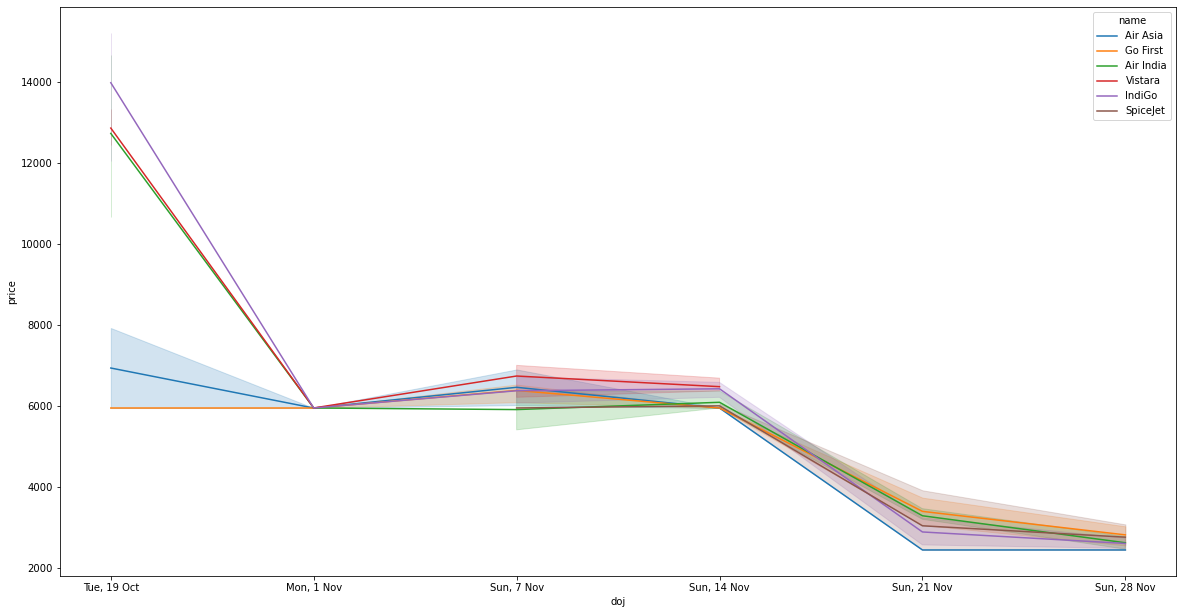

In [85]:
plt.figure(figsize=(20,500))
plt.subplot(40,1,1)
sns.lineplot(x='doj',y='price',data=df_vis,hue='name')
plt.show()

We can observe that the ticket price are low of flights that are in later dates or next month and price is higher for the immediate flights. Therefore, Best time to book the flight is 1 month before the travel

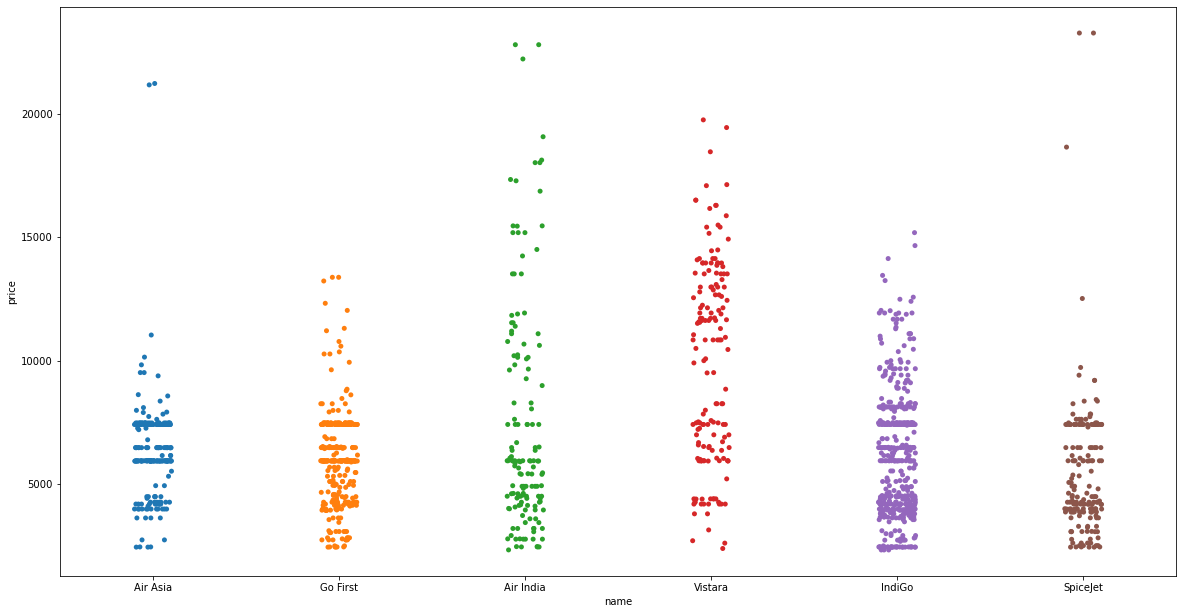

In [86]:
plt.figure(figsize=(20,500))
plt.subplot(40,1,1)
sns.stripplot(x='name', y="price", data=df)
plt.show()

We can observe that Indigo flight price is comapretively low as compared to AirIndia, Vistara.

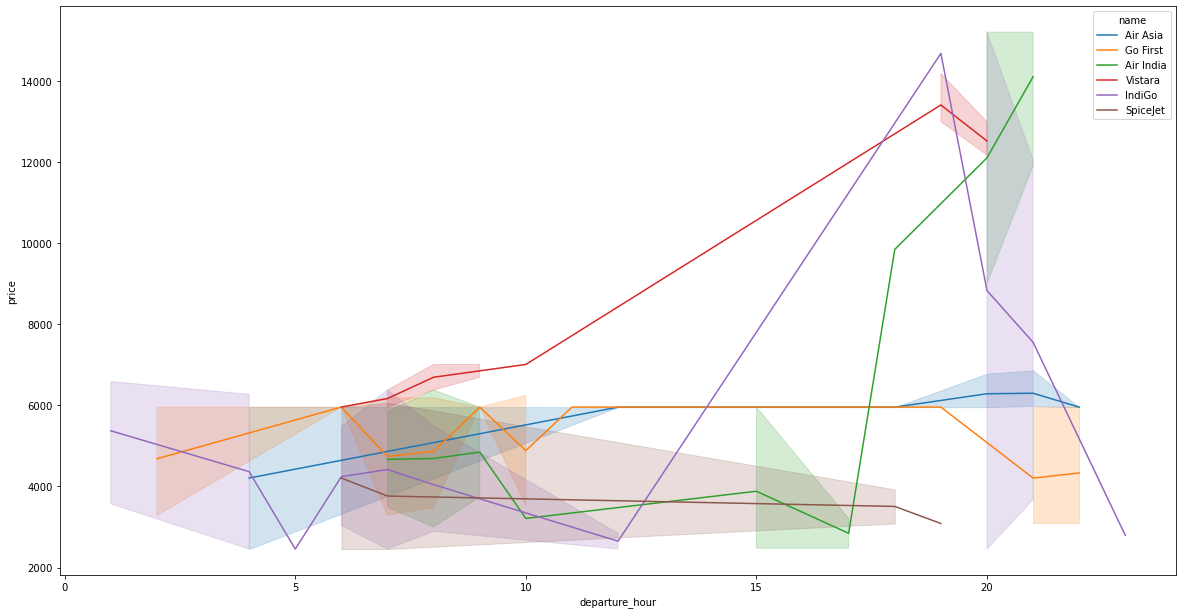

In [87]:
plt.figure(figsize=(20,500))
plt.subplot(40,1,1)
sns.lineplot(x='departure_hour',y='price',data=df_vis,hue='name')
plt.show()

We can observe that early morning flights are cheaper than the late flights

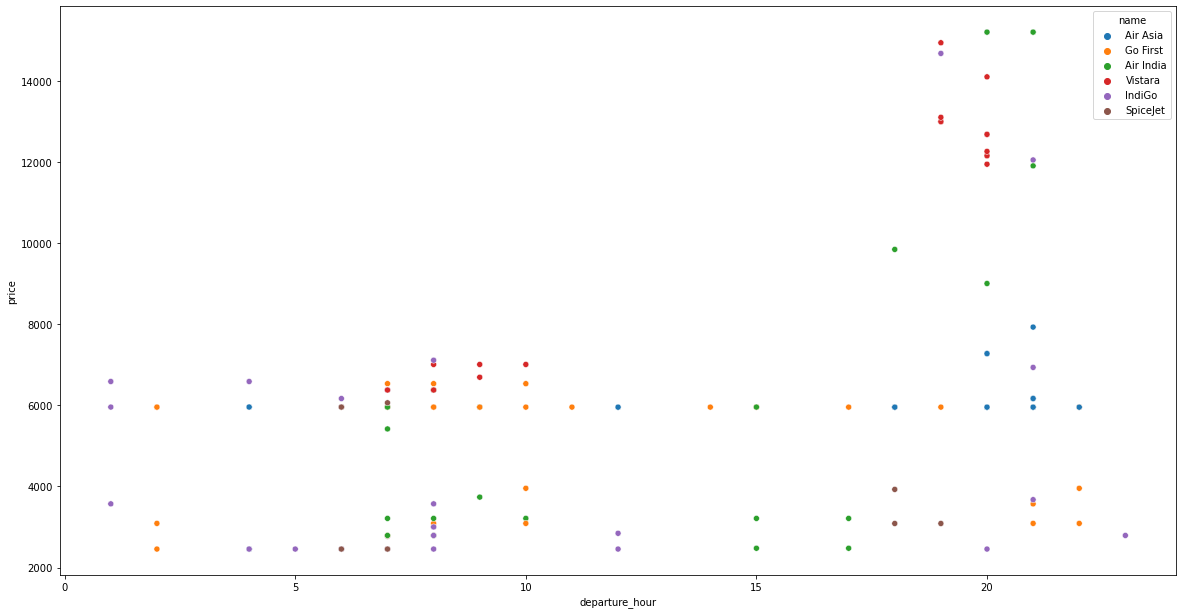

In [88]:
plt.figure(figsize=(20,500))
plt.subplot(40,1,1)
sns.scatterplot(x='departure_hour',y='price',data=df_vis,hue='name')
plt.show()

In [89]:
df.dtypes

name                object
stop                object
price                int32
departure_loc       object
arrival_loc         object
doj                 object
departure_hour       int32
departure_minute     int32
arrival_hour         int32
arrival_minute       int32
duration_hour        int32
duration_minute      int32
day                 object
date                 int32
month               object
dtype: object

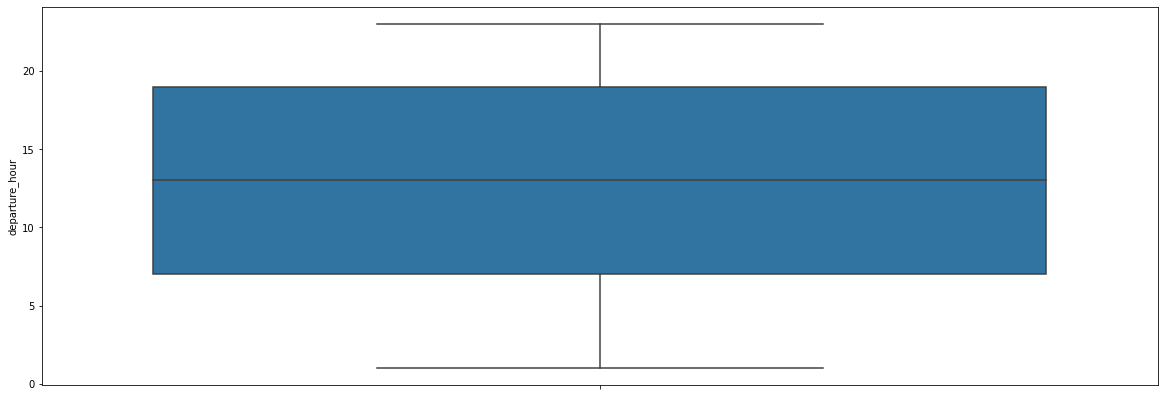

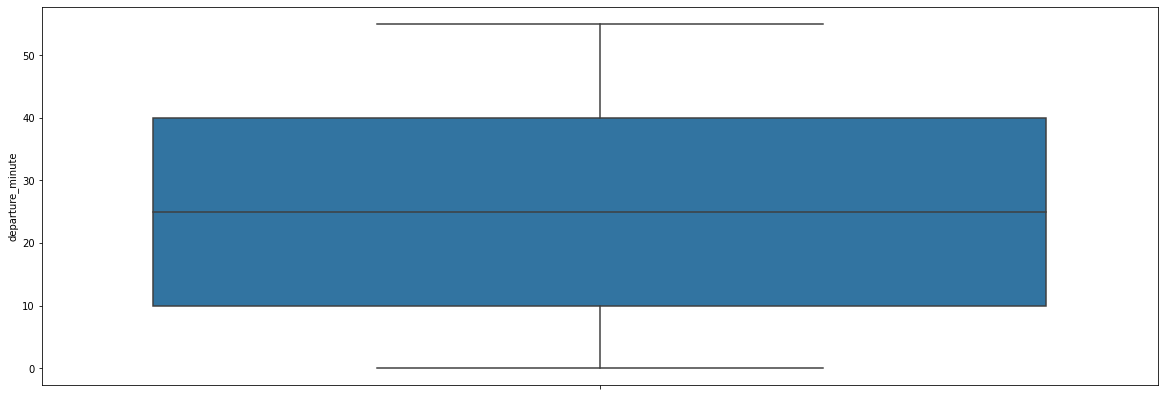

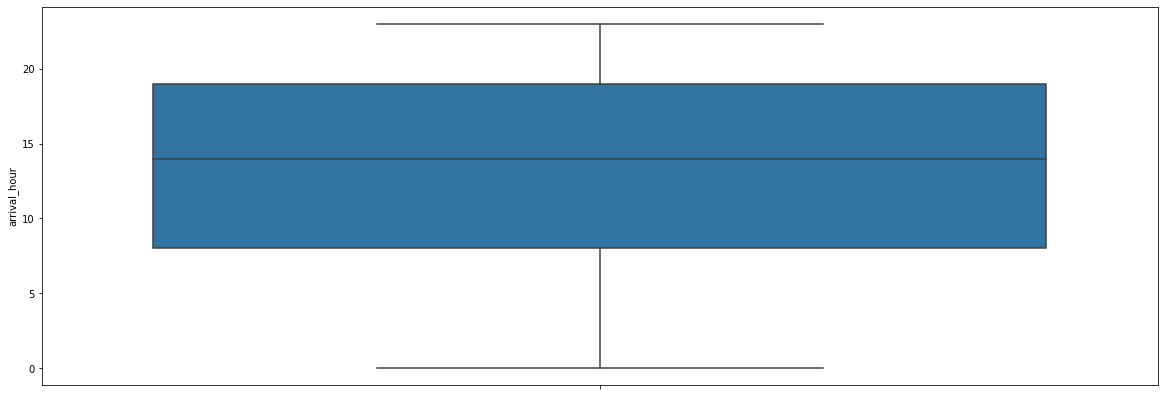

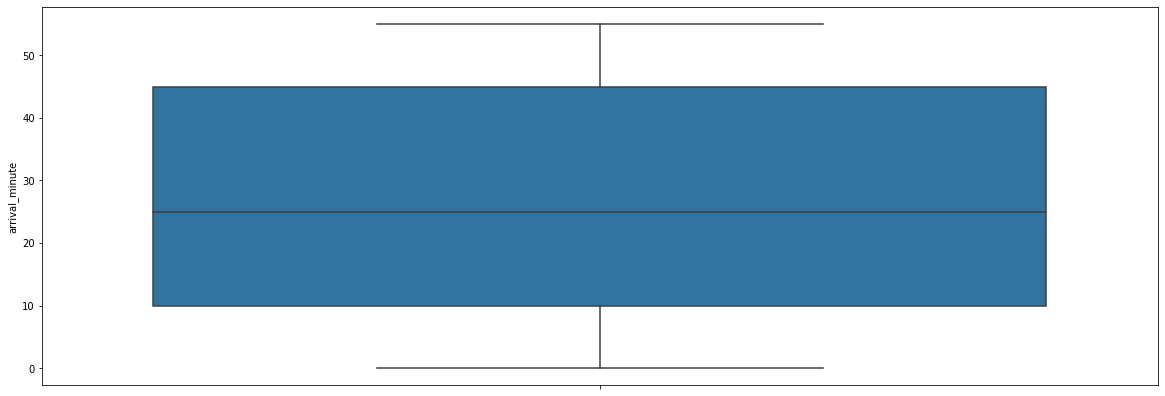

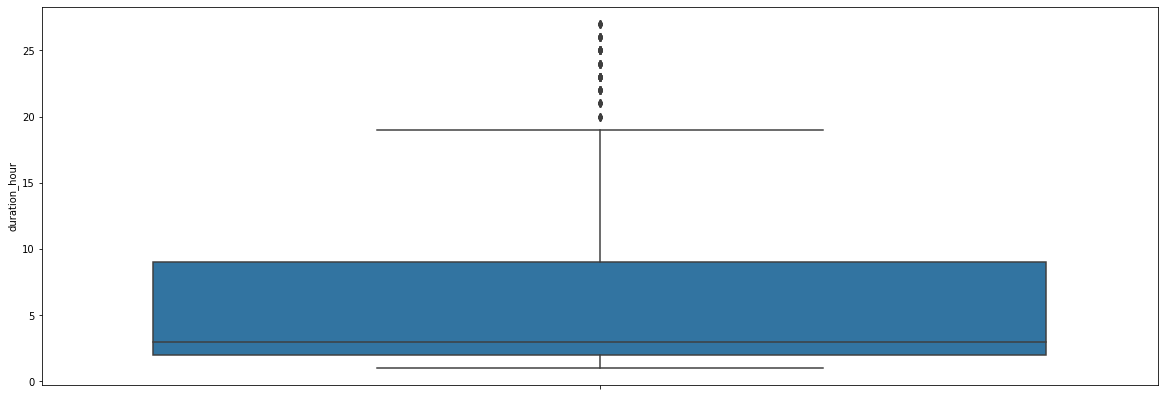

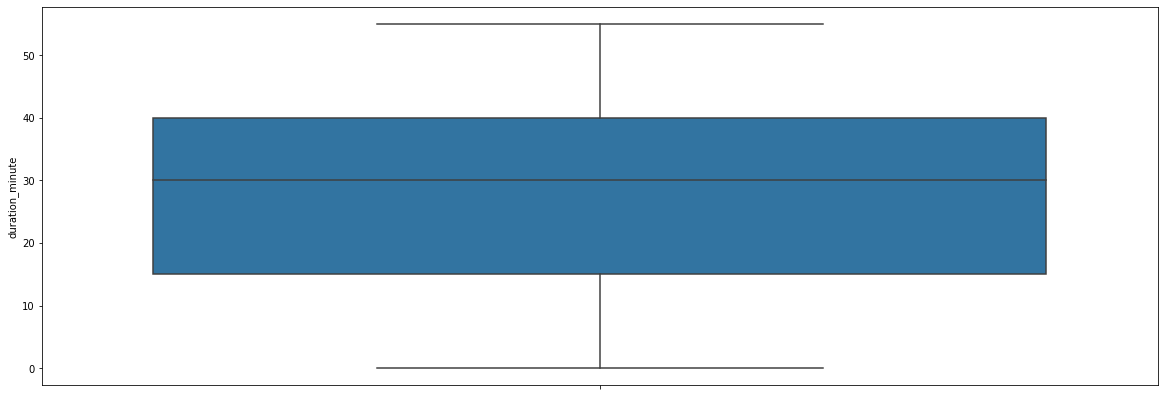

In [90]:
continous=['departure_hour', 'departure_minute', 'arrival_hour', 'arrival_minute',
       'duration_hour', 'duration_minute']
counter=1;
for i in range(0,len(continous)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.boxplot(y=continous[i],hue = continous[i],data=df)
        plt.show()

In [91]:
df.drop(['doj'],axis=1,inplace=True)

In [92]:
categorical_columns=['name','stop', 'departure_loc', 'arrival_loc','day','month']

In [93]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    df[col] =  LE.fit_transform(df[col])

In [94]:
fin_df  = df.drop(categorical_columns,axis=1)
#fin_df  = fin_df.drop('price',axis=1)
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

In [95]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

In [96]:
#fin_df_new= fin_df_new.join(df['price'])
for i in categorical_columns:
    fin_df_new=fin_df_new.join(df[i])

In [97]:
#fin_df_new=fin_df_new.join(df['price'])

In [98]:
x = fin_df_new.drop('price',axis=1)
y = fin_df_new['price']

# model building

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)

Best R2 Score is 0.7487254141677915 on Random State 48


In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=192)

In [136]:
from sklearn import metrics
regr = LinearRegression()
regr.fit(x_train, y_train)
pred=regr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.7193417469577079
MAE: 0.40581145415946346
MSE: 0.275342407122605
RMSE: 0.524730794905926


In [137]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred=rr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.7193439530583787
MAE: 0.4058082766795796
MSE: 0.27534024280688474
RMSE: 0.5247287325913121


In [138]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred=model_lasso.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.7221521087335158
MAE: 0.4018958450229042
MSE: 0.2725852753873066
RMSE: 0.5220969980638719


In [139]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred=model_enet.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.7208857487896936
MAE: 0.40300046951269486
MSE: 0.2738276496678987
RMSE: 0.5232854380430423


In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('R2 score', r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.8150690017212923
MAE: 0.21654402209030146
MSE: 0.18142828748375592
RMSE: 0.4259439957127649


In [141]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.9078191225732629
MAE: 0.18444255639699758
MSE: 0.09043491294562749
RMSE: 0.3007239813277742


In [142]:
print("Cross validation score:",cross_val_score(regr,x,y,cv=5,scoring='r2').mean())

Cross validation score: 0.6158892985389695


In [143]:
print("Cross validation score:",cross_val_score(rr,x,y,cv=5).mean())

Cross validation score: 0.6158877801015066


In [144]:
print("Cross validation score:",cross_val_score(model_lasso,x,y,cv=5).mean())

Cross validation score: 0.6228382754349593


In [145]:
print("Cross validation score:",cross_val_score(model_enet,x,y,cv=5).mean())

Cross validation score: 0.6183979754071827


In [146]:
print("Cross validation score:",cross_val_score(dtr,x,y,cv=5).mean())

Cross validation score: 0.33262243957693516


In [147]:
print("Cross validation score:",cross_val_score(rdr,x,y,cv=5,scoring='r2').mean())

Cross validation score: 0.4859974181281669


In [1]:
# We are selecting linear regression for hyper-parameter tuning as the difference between cross validatio score and r2 score is very high

# parameter hypertuning

In [113]:
from sklearn.model_selection import GridSearchCV

In [151]:
parameter = {
 'normalize': [True,False],
 'n_jobs': [0,1, 4,50,100],
 'positive': [True,False],
}
GCV = GridSearchCV(LinearRegression(),parameter,cv=5)


In [152]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [0, 1, 4, 50, 100],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [153]:
GCV.best_params_

{'n_jobs': 0, 'normalize': True, 'positive': False}

In [154]:
rdr = LinearRegression(n_jobs=0,normalize=True,positive=False)
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.7193417469577079
MAE: 0.40581145415946335
MSE: 0.2753424071226048
RMSE: 0.5247307949059259


In [ ]:
import joblib
joblib.dump(rdr,"flight.pkl")
